# 1. Exploratory Data Analysis

In [210]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, f1_score, mean_squared_error, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# Seeds were used for reliable randomness / reproducability of the project
random.seed(42)

### Unprocessed form of the dataset

In [112]:
df = pd.read_csv('german_credit_risk.csv')
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


### Below are initial visualisations for gaining simple insights to the data for:




*   Gender Distribution
*   Risk Assessment Distribution
*   Credit Amount vs Gender
*   Numerical Distributions





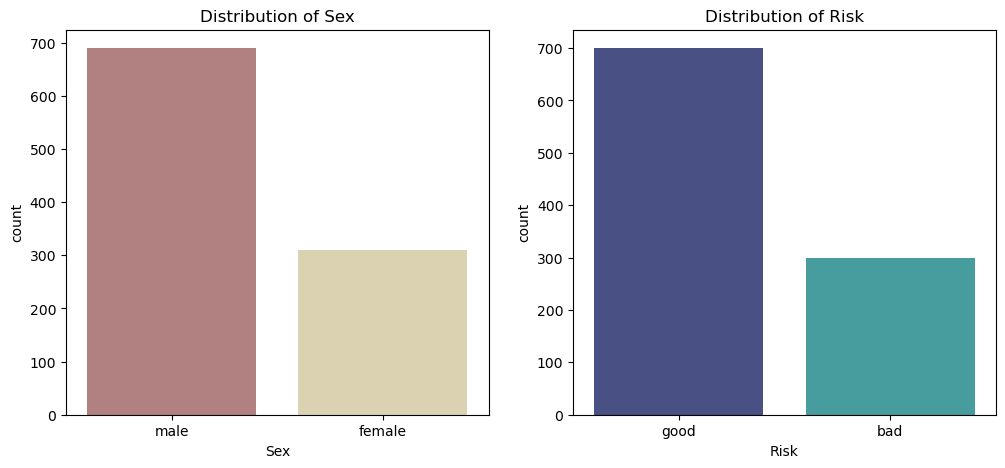

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for categorical variable 'Sex'
sns.countplot(x='Sex', data=df, palette="pink", ax=axes[0])
axes[0].set_title('Distribution of Sex')

# Plot for categorical variable 'Risk'
sns.countplot(x='Risk', data=df, palette="mako", ax=axes[1])
axes[1].set_title('Distribution of Risk')

plt.show()

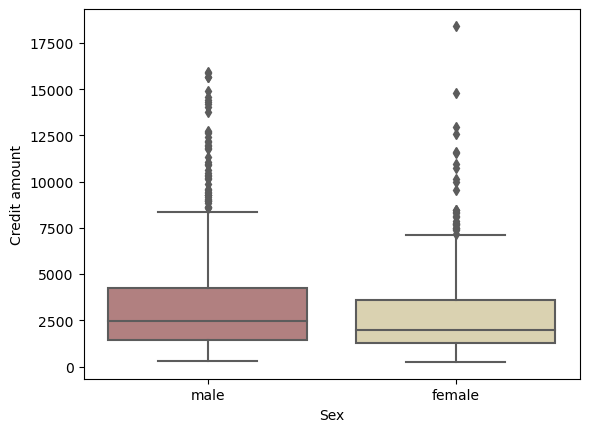

In [5]:
# 'Sex' vs 'Credit amount'
sns.boxplot(x='Sex', y='Credit amount', data=df, palette = "pink")
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

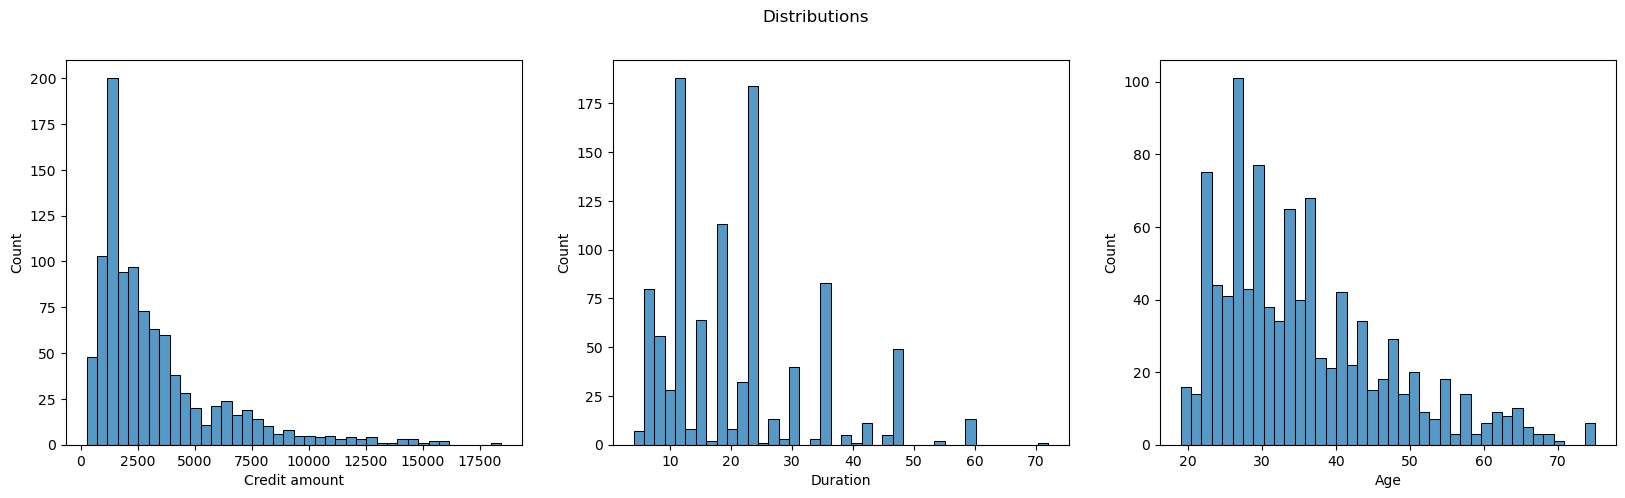

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
plt.suptitle('Distributions')

sns.histplot(df['Credit amount'], bins=40, ax=ax[0])
sns.histplot(df['Duration'], bins=40, ax=ax[1])
sns.histplot(df['Age'], bins=40, ax=ax[2])

## Here all categorical variables (6 of them) are explored.

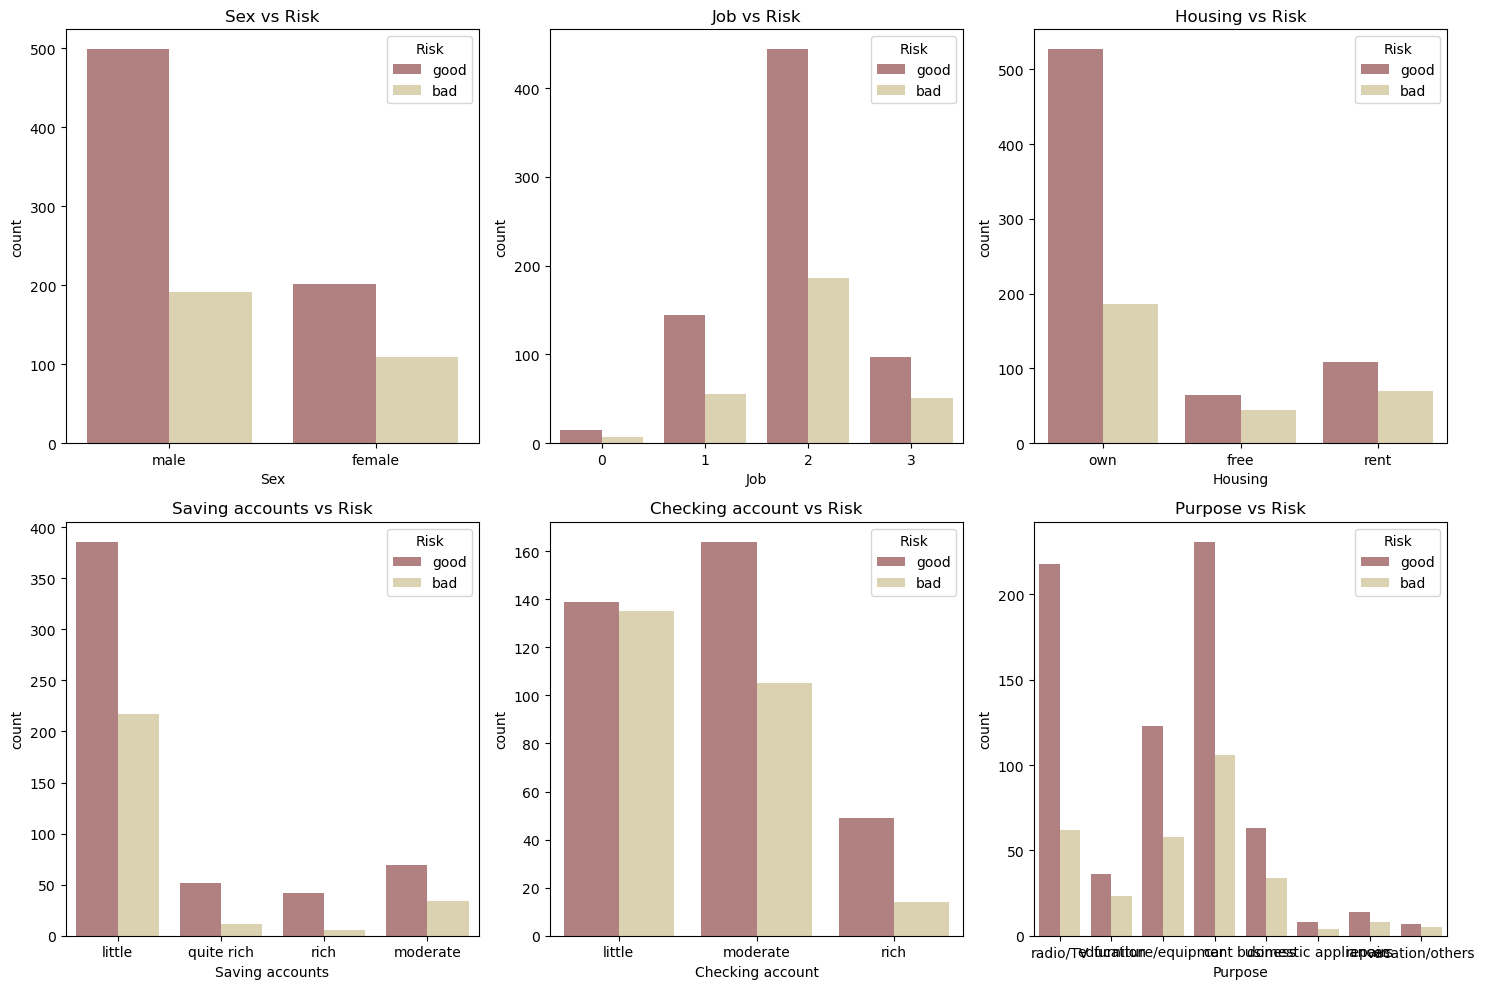

In [7]:
# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Categorical Variables
categorical_vars = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Plot each categorical variable with respect to 'Risk' in the grid layout
for i, var in enumerate(categorical_vars):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index

    sns.countplot(x=var, hue="Risk", data=df, ax=axes[row, col], palette = "pink")
    axes[row, col].set_title(f'{var} vs Risk')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


## Following the categorical data, all numerical data (3 of them) are explored

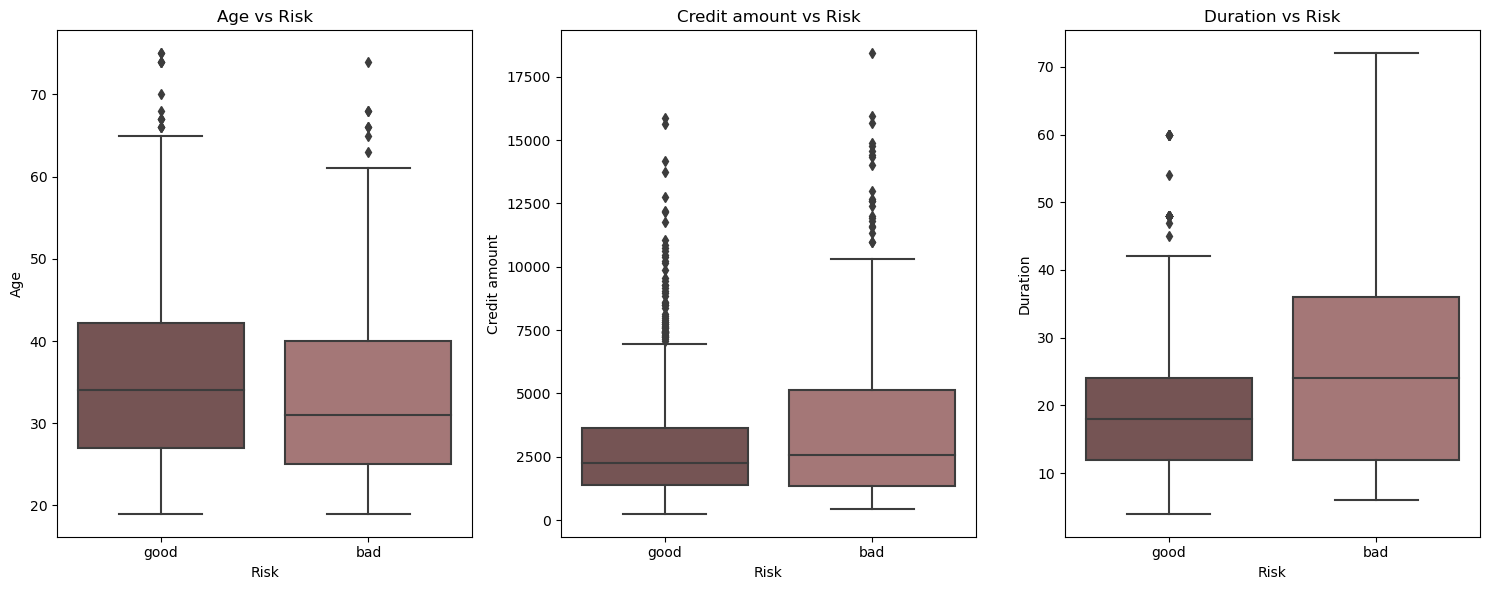

In [8]:
# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

# Numerical Variables
numerical_vars = ['Age', 'Credit amount', 'Duration']

# Set the palette to "pink"
sns.set_palette("pink")

# Plot each numerical variable with respect to 'Risk' in the grid layout
for i, var in enumerate(numerical_vars):
    sns.boxplot(x='Risk', y=var, data=df, ax=axes[i])
    axes[i].set_title(f'{var} vs Risk')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


## The only two missing variables are explored here



---

Skewness on both variables (especially for "Saving acccount") should be noted.

---



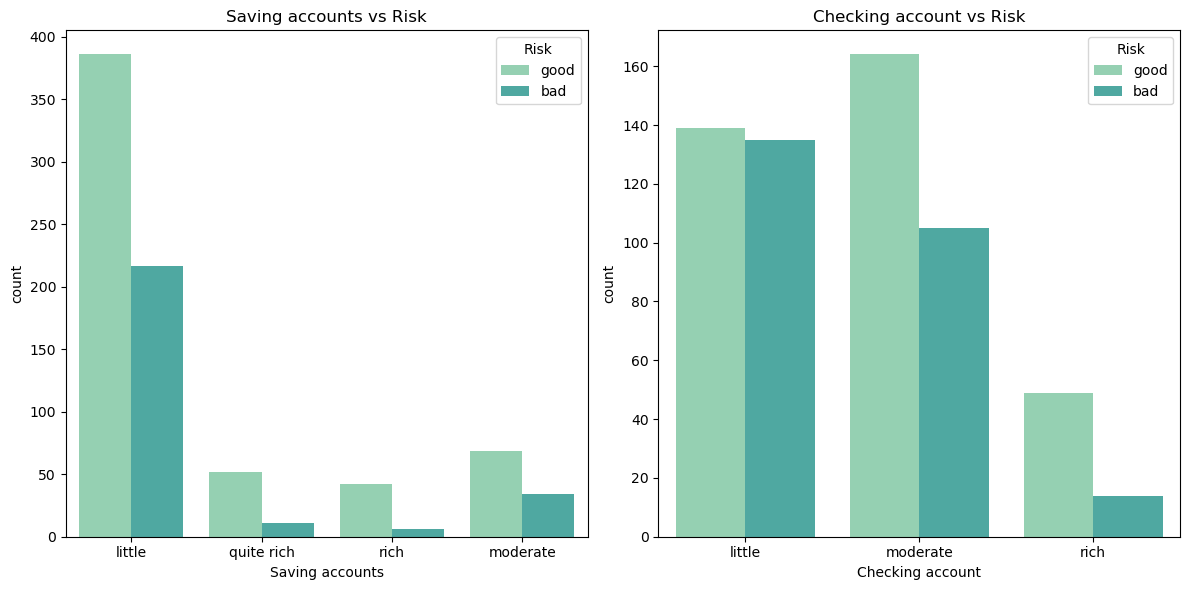

In [9]:
# Create a figure and axes with a grid layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Set the palette to "pink"
sns.set_palette("mako_r")

# Plot countplots for 'Saving accounts' and 'Checking account'
sns.countplot(x='Saving accounts', hue='Risk', data=df, ax=axes[0])
axes[0].set_title('Saving accounts vs Risk')

sns.countplot(x='Checking account', hue='Risk', data=df, ax=axes[1])
axes[1].set_title('Checking account vs Risk')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

Same data for missing values, in numbers.

In [10]:
# Statistical properties of 'Saving accounts'
saving_accounts_stats = df['Saving accounts'].describe()

# Statistical properties of 'Checking account'
checking_account_stats = df['Checking account'].describe()

# Display the statistical properties
print("Saving accounts:")
print(saving_accounts_stats)
print()

print("Checking account:")
print(checking_account_stats)


Saving accounts:
count        817
unique         4
top       little
freq         603
Name: Saving accounts, dtype: object

Checking account:
count        606
unique         3
top       little
freq         274
Name: Checking account, dtype: object


## Other categorical variables with unique properties are explored.

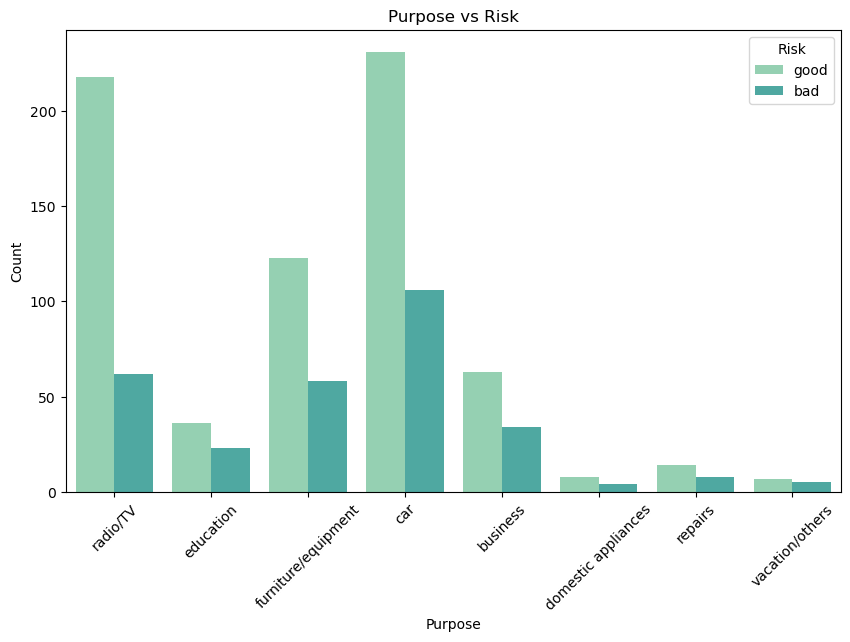

In [11]:
# Create a stacked bar chart for 'Purpose' vs 'Risk'
plt.figure(figsize=(10, 6))
sns.countplot(x='Purpose', hue='Risk', data=df)
plt.title('Purpose vs Risk')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Risk', loc='upper right')
plt.show()


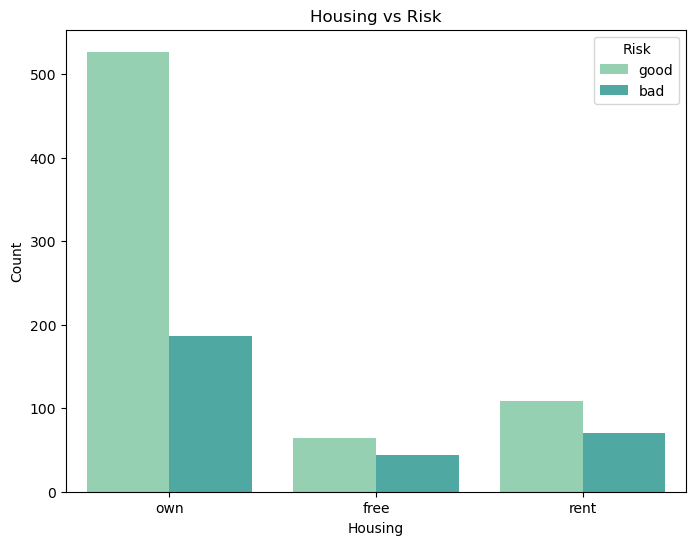

In [12]:
# Create a grouped bar chart for 'Housing' vs 'Risk'
plt.figure(figsize=(8, 6))
sns.countplot(x='Housing', hue='Risk', data=df)
plt.title('Housing vs Risk')
plt.xlabel('Housing')
plt.ylabel('Count')
plt.legend(title='Risk', loc='upper right')
plt.show()


## The heatmap shows correlations between variables before preprocessing where:

Duration & Credit amount is the only correlation > 0.50

In [ ]:
# Heatmap to show correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

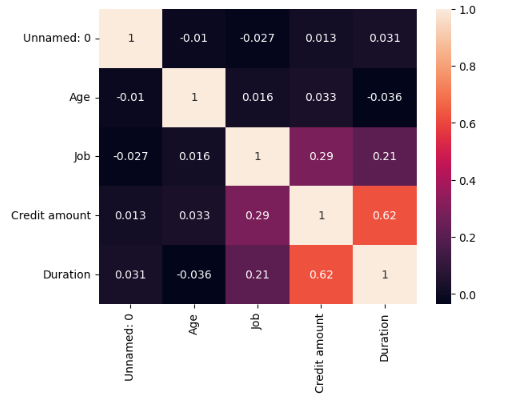

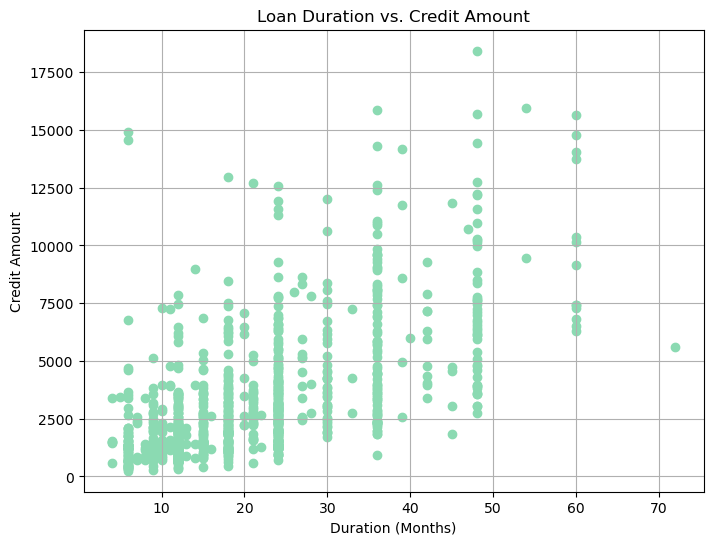

In [138]:
# Extract loan duration and credit amount columns
loan_duration = df['Duration']  # Replace with actual column name
credit_amount = df['Credit amount']  # Replace with actual column name

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(loan_duration, credit_amount)

# Label the axes
plt.xlabel('Duration (Months)')
plt.ylabel('Credit Amount')

# Add a title
plt.title('Loan Duration vs. Credit Amount')

# Optional: Show grid lines for better readability
plt.grid(True)

# Show the plot
plt.show()

# 2. Data Preprocessing

## Before implementing Machine Learning models:



1.   Missing values should be treated
2.   Categorical values should be encoded where necessary



## 2.1-) Missing Value Treatment

As shown below:

*   Saving accounts
*   Checking account

variables have 20% and 40% missing data in their columns, respectively.


---

This can be adressed by mode imputation (due to the categorical nature of data), constant imputation or a ML Imputation with cross-validation such as k-NN Imputation.

The most successful method is investigated below.

In [14]:
print(df['Saving accounts'].value_counts())
print(df['Checking account'].value_counts())

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64
Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Option 1, Framework for:

Imputation with a constant value or a new category

In [17]:
#Imputation with a constant value or a new category

# Assuming df is your DataFrame
df_constant = pd.read_csv('german_credit_risk.csv')

# Filling NaN values with 'Unknown'
df_constant['Saving accounts'].fillna('Unknown', inplace=True)
df_constant['Checking account'].fillna('Unknown', inplace=True)

Option 2, Framework for:

Imputation with Mode

In [18]:
# Filling NaN values with the mode (most frequent category)

df_mode = pd.read_csv('german_credit_risk.csv')


df_mode['Saving accounts'].fillna(df_mode['Saving accounts'].mode()[0], inplace=True)
df_mode['Checking account'].fillna(df_mode['Checking account'].mode()[0], inplace=True)


Option 3, Framework for:

Imputation with k-NN Model

In [117]:
# Creating an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Selecting categorical columns to be encoded
cat_cols = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

# Copying the dataframe to avoid changing the original one
df_encoded = df.copy()

# Encoding the categorical columns
df_encoded[cat_cols] = encoder.fit_transform(df[cat_cols])

# Creating an instance of the KNNImputer
imputer = KNNImputer(n_neighbors=5)

# Applying the imputer
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns = df.columns)

# Decoding the categorical columns back to their original form
df_encoded[cat_cols] = encoder.inverse_transform(df_encoded[cat_cols])


Although this is not reflected in the process, the case for MCAR (Missing Completely At Random) was checked:

The low correlation between the two missing data points suggest such case, but since the statistical significance is not explored, we leave the finding as is.

In [20]:
# Creating a dataframe indicating whether values are missing
missing_df = df.isnull()

# Calculating the correlation between missingness of different columns
corr = missing_df.corr()

print(corr)

                  Unnamed: 0  Age  Sex  Job  Housing  Saving accounts  \
Unnamed: 0               NaN  NaN  NaN  NaN      NaN              NaN   
Age                      NaN  NaN  NaN  NaN      NaN              NaN   
Sex                      NaN  NaN  NaN  NaN      NaN              NaN   
Job                      NaN  NaN  NaN  NaN      NaN              NaN   
Housing                  NaN  NaN  NaN  NaN      NaN              NaN   
Saving accounts          NaN  NaN  NaN  NaN      NaN         1.000000   
Checking account         NaN  NaN  NaN  NaN      NaN         0.142364   
Credit amount            NaN  NaN  NaN  NaN      NaN              NaN   
Duration                 NaN  NaN  NaN  NaN      NaN              NaN   
Purpose                  NaN  NaN  NaN  NaN      NaN              NaN   
Risk                     NaN  NaN  NaN  NaN      NaN              NaN   

                  Checking account  Credit amount  Duration  Purpose  Risk  
Unnamed: 0                     NaN            

## Trial of all 3 imputation options and their accuracy reports are found below.

Since the ***constant imputer*** yielded the highest accuracy score, both missing data points have been imputed with "Unknown".

In [22]:
# Assuming df is your DataFrame and 'Risk' is the target variable
df_t = pd.read_csv('german_credit_risk.csv')
df_t['Risk'] = df_t['Risk'].apply(lambda x: 1 if x=='good' else 0)

# List of imputers
imputers = {
    'constant': SimpleImputer(strategy='constant', fill_value='Unknown'),
    'mode': SimpleImputer(strategy='most_frequent'),
    'knn': KNNImputer(n_neighbors=5)
}

# Initialize encoder
encoder = OrdinalEncoder()

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df_t.drop('Risk', axis=1), df_t['Risk'], 
                                                    test_size=0.2, random_state=42)

# Iterating over imputers
for name, imputer in imputers.items():
    # Copy the train and test sets
    X_train_imputed = X_train.copy()
    X_test_imputed = X_test.copy()

    # Apply encoding for knn imputer
    if name == 'knn':
        X_train_imputed[['Saving accounts', 'Checking account']] = encoder.fit_transform(X_train_imputed[['Saving accounts', 'Checking account']])
        X_test_imputed[['Saving accounts', 'Checking account']] = encoder.transform(X_test_imputed[['Saving accounts', 'Checking account']])
        
    # Perform imputation
    X_train_imputed[['Saving accounts', 'Checking account']] = imputer.fit_transform(X_train_imputed[['Saving accounts', 'Checking account']])
    X_test_imputed[['Saving accounts', 'Checking account']] = imputer.transform(X_test_imputed[['Saving accounts', 'Checking account']])

    # If knn, inverse transform after imputation
    if name == 'knn':
        X_train_imputed[['Saving accounts', 'Checking account']] = encoder.inverse_transform(X_train_imputed[['Saving accounts', 'Checking account']])
        X_test_imputed[['Saving accounts', 'Checking account']] = encoder.inverse_transform(X_test_imputed[['Saving accounts', 'Checking account']])
    
    # One-hot encoding for the categorical features
    X_train_imputed = pd.get_dummies(X_train_imputed)
    X_test_imputed = pd.get_dummies(X_test_imputed)

    # Training the model
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_imputed, y_train)

    # Predicting the test set results and calculating the accuracy
    y_pred = model.predict(X_test_imputed)
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Imputer: {name}, Accuracy: {accuracy}')


Imputer: constant, Accuracy: 0.725
Imputer: mode, Accuracy: 0.7
Imputer: knn, Accuracy: 0.7


### *df_constant* after the missing value treatment

In [118]:
df_constant.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,1.652403,male,2,own,Unknown,little,2.087504,1.080418,radio/TV,good
1,1,1.419607,female,2,own,little,moderate,2.271247,1.587564,radio/TV,bad
2,2,1.591686,male,1,own,little,Unknown,2.157358,1.271150,education,good
3,3,1.574565,male,2,free,little,little,2.299828,1.560500,furniture/equipment,good
4,4,1.607232,male,2,free,little,little,2.250350,1.439569,car,bad


In [139]:
df_constant.isnull().sum()

Unnamed: 0          0
Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [140]:
df_t.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,0
2,2,49,male,1,own,little,NaN,2096,12,education,1
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,1
4,4,53,male,2,free,little,little,4870,24,car,0


In [141]:
df = df_constant.copy()
df['Risk'] = df['Risk'].apply(lambda x: 1 if x=='good' else 0)
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,0.975466,male,2,own,Unknown,little,1.127363,0.732569,radio/TV,1
1,1,0.883605,female,2,own,little,moderate,1.185171,0.950717,radio/TV,0
2,2,0.952309,male,1,own,little,Unknown,1.149736,0.820286,education,1
3,3,0.945681,male,2,free,little,little,1.193870,0.940202,furniture/equipment,1
4,4,0.958289,male,2,free,little,little,1.178763,0.891821,car,0
...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.914863,female,1,own,little,Unknown,1.142737,0.820286,furniture/equipment,1
996,996,0.936268,male,3,own,little,little,1.171081,0.912001,car,1
997,997,0.932077,male,2,own,little,Unknown,1.111867,0.820286,radio/TV,1
998,998,0.887828,male,2,free,little,little,1.145021,0.945681,radio/TV,0


## 2.2-) Further Data Preprocessing


### As shown in the data exploration part, the numerical values are different in their scales from each other and log-scaling can help in this case.

Log-Scaling of the numerical columns:

In [119]:
# List of numerical columns to be log transformed
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Apply log(1 + x) transformation to all numerical columns
for col in numerical_columns:
    df_constant[col] = np.log1p(df_constant[col])

# Print the new DataFrame to verify
df_constant.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,0.975466,male,2,own,Unknown,little,1.127363,0.732569,radio/TV,good
1,1,0.883605,female,2,own,little,moderate,1.185171,0.950717,radio/TV,bad
2,2,0.952309,male,1,own,little,Unknown,1.149736,0.820286,education,good
3,3,0.945681,male,2,free,little,little,1.193870,0.940202,furniture/equipment,good
4,4,0.958289,male,2,free,little,little,1.178763,0.891821,car,bad


### In order to make the categorical variables suitable for all Machine Learning Models, we'll use One-hot Encoding.

This method is suitable since there are small numbers of possible values for all categorical variables.

In [225]:
# List of categorical columns to be one-hot encoded
categorical_columns = ['Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)
df_encoded["Sex"] = df_encoded["Sex"].apply(lambda x : 1 if x == "male" else 0)

# Print the new DataFrame to verify
df_encoded

,Unnamed: 0,Age,Sex,Credit amount,Duration,Risk,cluster,Job_0,Job_1,Job_2,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,0.975466,1,1.127363,0.732569,1,2,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,1,0.883605,0,1.185171,0.950717,0,1,False,False,True,...,True,False,False,False,False,False,False,True,False,False
2,2,0.952309,1,1.149736,0.820286,1,2,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,3,0.945681,1,1.193870,0.940202,1,1,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,4,0.958289,1,1.178763,0.891821,0,1,False,False,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.914863,0,1.142737,0.820286,1,0,False,True,False,...,False,False,False,False,False,False,True,False,False,False
996,996,0.936268,1,1.171081,0.912001,1,1,False,False,False,...,False,False,False,True,False,False,False,False,False,False
997,997,0.932077,1,1.111867,0.820286,1,2,False,False,True,...,False,False,False,False,False,False,False,True,False,False
998,998,0.887828,1,1.145021,0.945681,0,1,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [226]:
df_encoded.replace({False: 0, True: 1}, inplace=True)
df_encoded

,Unnamed: 0,Age,Sex,Credit amount,Duration,Risk,cluster,Job_0,Job_1,Job_2,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,0.975466,1,1.127363,0.732569,1,2,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0.883605,0,1.185171,0.950717,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,2,0.952309,1,1.149736,0.820286,1,2,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,0.945681,1,1.193870,0.940202,1,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,4,0.958289,1,1.178763,0.891821,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.914863,0,1.142737,0.820286,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
996,996,0.936268,1,1.171081,0.912001,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
997,997,0.932077,1,1.111867,0.820286,1,2,0,0,1,...,0,0,0,0,0,0,0,1,0,0
998,998,0.887828,1,1.145021,0.945681,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0


#### Below are the log-scaled numerical columns.

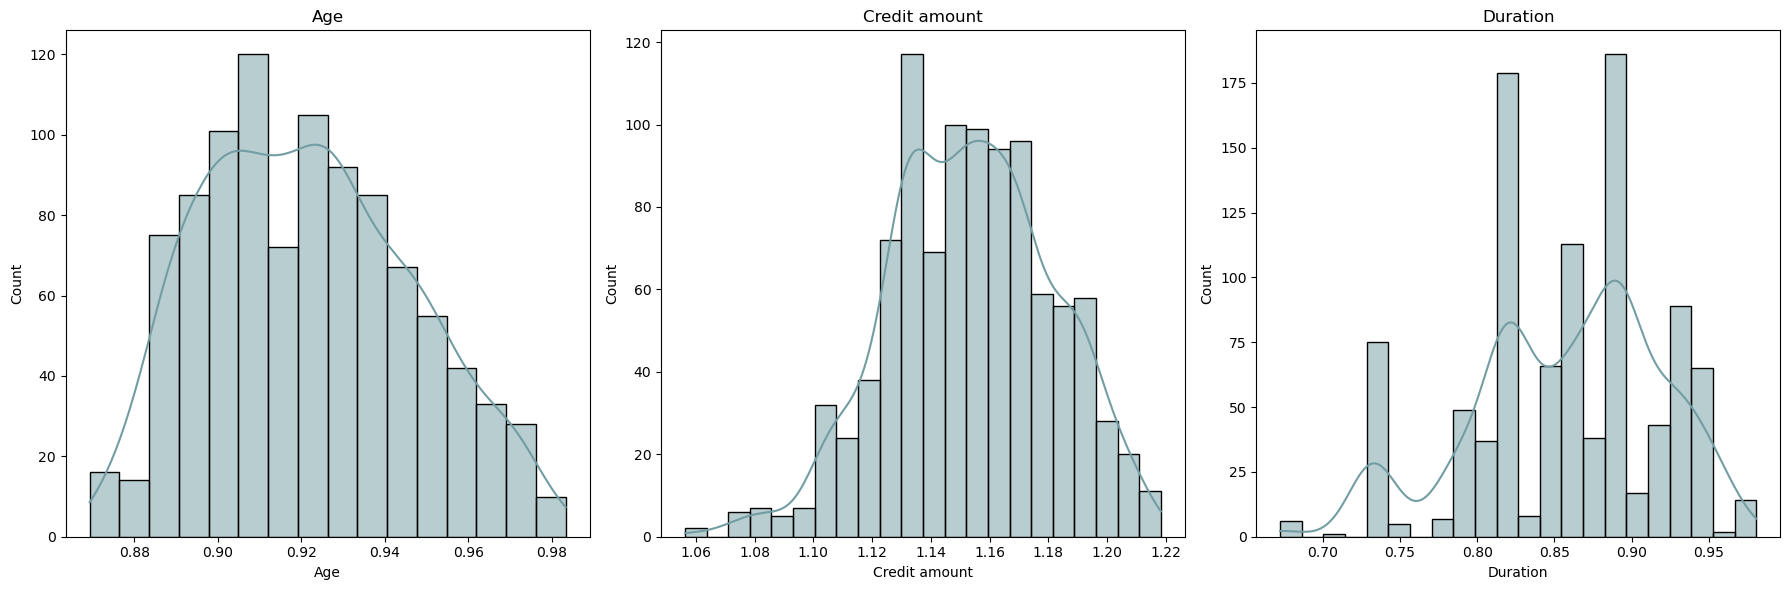

In [227]:
# List of numerical columns
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Number of columns for the subplot grid
num_cols = 3

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=num_cols, figsize=(18, 6))

# Draw a histogram and KDE for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(df_encoded[col], kde=True, color="#729da3", ax=axs[i])
    axs[i].set_title(col)

# Display the figure with subplots
plt.tight_layout()
plt.show()

### To further eliminate the difference in numerical scales of "Initially numerical columns", Standardization will be applied as well.

In [145]:
df_excluded = df_encoded.iloc[:, 1:]

In [217]:
df_excluded.head()

,Age,Sex,Credit amount,Duration,Risk,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0.975466,1,1.127363,0.732569,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.883605,0,1.185171,0.950717,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0.952309,1,1.149736,0.820286,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.945681,1,1.193870,0.940202,1,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
4,0.958289,1,1.178763,0.891821,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0


In [218]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame
df_encoded_copy = df_excluded.copy()

# List of numerical columns
numerical_columns = ['Age', 'Credit amount', 'Duration']

# Create a scaler object
scaler = StandardScaler()

# Apply the scaler only to the numerical columns of the DataFrame copy
df_encoded_copy[numerical_columns] = scaler.fit_transform(df_encoded_copy[numerical_columns])

# Print the new DataFrame to verify
print(df_encoded_copy.head())


        Age  Sex  Credit amount  Duration  Risk  Job_0  Job_1  Job_2  Job_3  \
0  2.145922    1      -0.923948 -2.049185     1      0      0      1      0   
1 -1.513967    0       1.141576  1.529744     0      0      0      1      0   
2  1.223291    1      -0.124556 -0.610097     1      0      1      0      0   
3  0.959224    1       1.452391  1.357242     1      0      0      1      0   
4  1.461570    1       0.912587  0.563503     0      0      0      1      0   

   Housing_free  ...  Checking account_moderate  Checking account_rich  \
0             0  ...                          0                      0   
1             0  ...                          1                      0   
2             0  ...                          0                      0   
3             1  ...                          0                      0   
4             1  ...                          0                      0   

   Purpose_business  Purpose_car  Purpose_domestic appliances  \
0              

#### Finally, clustering by numerical data can help train our Machine Learning models as well.

Below, we search a plausible k hyperparameter for k-means clustering method, via Elbow Method.

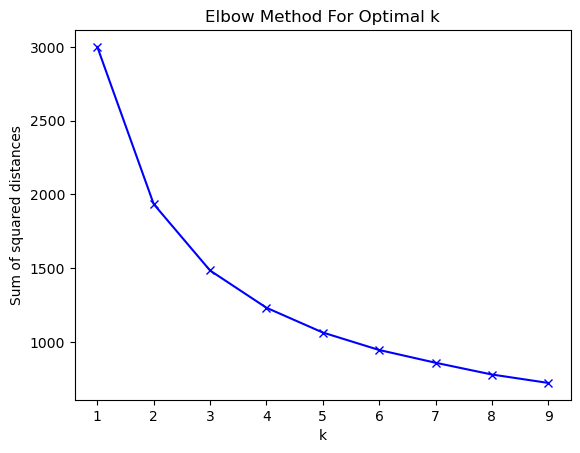

In [219]:
# Extract only the numerical columns for k-means clustering
numerical_data = df_encoded_copy[numerical_columns]

# Calculate sum of squared distances
ssd = []
K = range(1,10)  # Check for up to 10 clusters
for k in K:
    km = KMeans(n_clusters=k, n_init = 10)
    km = km.fit(numerical_data)
    ssd.append(km.inertia_)  # Sum of squared distances

# Plot sum of squared distances / Inertia
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()


#### By the graph, k = 3 has been chosen as a good candidate, also considering the dimensionality of the columns.

In [220]:
# Define the number of clusters
n_clusters = 3

# Create a k-means object and fit it to the numerical data
km = KMeans(n_clusters=n_clusters, random_state=0, n_init = 10)
clusters = km.fit_predict(df_encoded_copy[numerical_columns])


### This 3D graph of clusters show a successful and possibly insightful selection of data points to the clusters.

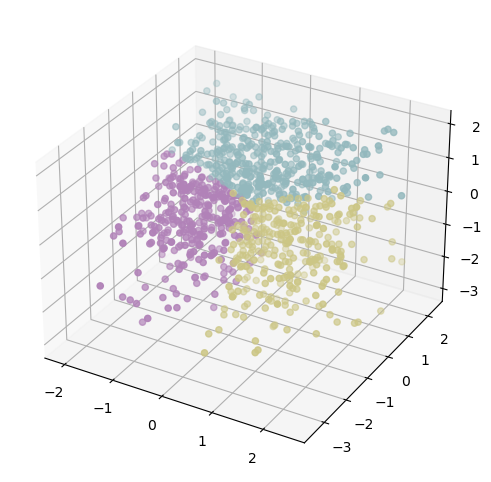

In [221]:

# Create a new figure
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for each data point
colors = ['#b182b8', '#93b8bd', '#ccc685']

# Plot each cluster with specific colors
for i in range(n_clusters):
    ax.scatter(df_encoded_copy.loc[clusters == i, 'Age'],
               df_encoded_copy.loc[clusters == i, 'Credit amount'],
               df_encoded_copy.loc[clusters == i, 'Duration'],
               c=colors[i])  # Assign specific color to each cluster

plt.show()


Despite the failure of clustering for Duration & Credit Amount pairs;

Age & Credit Amount and Age & Duration pairs yielded visually distinct clusters.

*This shows the success of clustering via Age.*

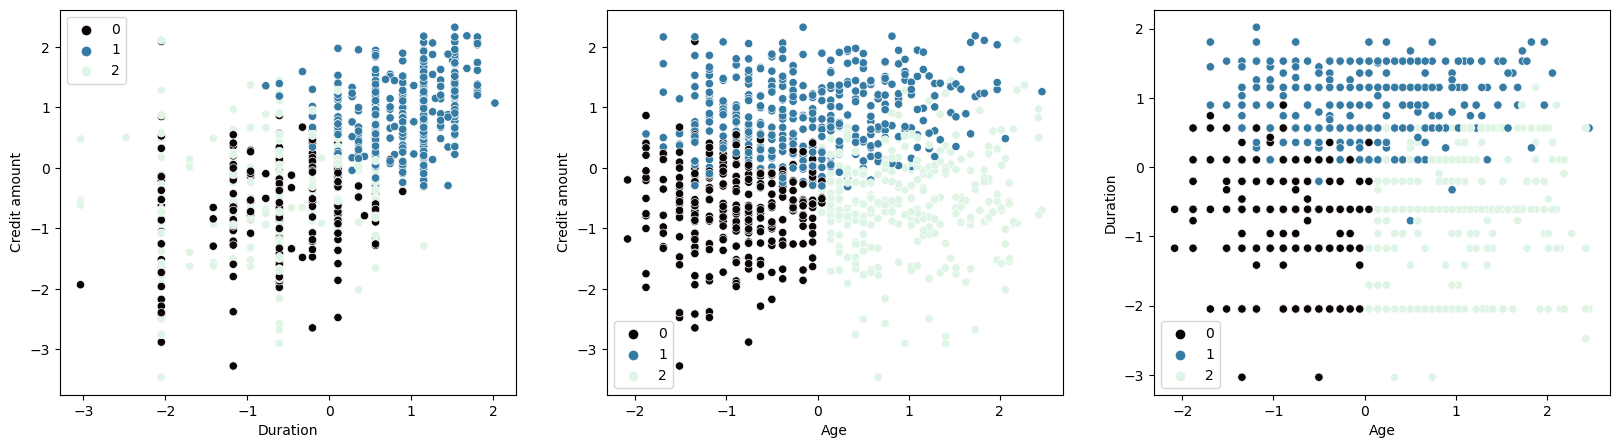

In [222]:
fig, ax  = plt.subplots(1,3,figsize=(20,5))

sns.scatterplot(x='Duration', y='Credit amount', hue=clusters, data=df_encoded_copy, ax=ax[0], palette='mako')
sns.scatterplot(x='Age', y='Credit amount', hue=clusters, data=df_encoded_copy, ax=ax[1], palette='mako')
sns.scatterplot(x='Age', y='Duration', hue=clusters, data=df_encoded_copy, ax=ax[2], palette='mako')

plt.show()


Finally the cluster data is added and preprocessing has been completed.

In [223]:
# the cluster labels as a new column to thhe DataFrame
df_encoded_copy['cluster'] = clusters

In [224]:
df_encoded_copy.groupby('cluster')[numerical_columns].mean()

,Age,Credit amount,Duration
cluster,,,
0,-0.876722,-0.628809,-0.513526
1,-0.069793,0.870439,0.852484
2,0.979464,-0.536156,-0.628438


The success of clustering by age (reverted back to original un-preprocessed form) is present below.

In [ ]:
# Add the cluster labels to your original DataFrame
df['cluster'] = clusters

# Perform groupby operation on the original DataFrame
df.groupby('cluster')[numerical_columns].mean()

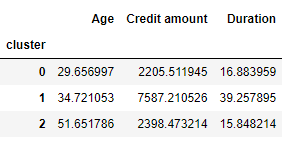

## WOE Binning 

In [107]:
#pip install scorecardpy

Note: you may need to restart the kernel to use updated packages.


In [108]:
#import scorecardpy as sc

[INFO] creating woe binning ...


C:\Users\ADMIN\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\ADMIN\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datetime_cols = dat.apply(pd.to_numeric,errors='ignore').select_dtypes(object).apply(pd.to_datetime,errors='ignore').select_dtypes('datetime64').columns.tolist()
C:\Users\ADMIN\anaconda3\Lib\site-packages\scorecardpy\condition_fun.py:40: UserWarning: Could not infer format, so each element will be parsed individu

{'Purpose': <Figure size 640x480 with 2 Axes>,
 'Unnamed: 0': <Figure size 640x480 with 2 Axes>,
 'Checking account': <Figure size 640x480 with 2 Axes>,
 'Age': <Figure size 640x480 with 2 Axes>,
 'Saving accounts': <Figure size 640x480 with 2 Axes>,
 'cluster': <Figure size 640x480 with 2 Axes>,
 'Credit amount': <Figure size 640x480 with 2 Axes>,
 'Housing': <Figure size 640x480 with 2 Axes>,
 'Job': <Figure size 640x480 with 2 Axes>,
 'Duration': <Figure size 640x480 with 2 Axes>,
 'Sex': <Figure size 640x480 with 2 Axes>}

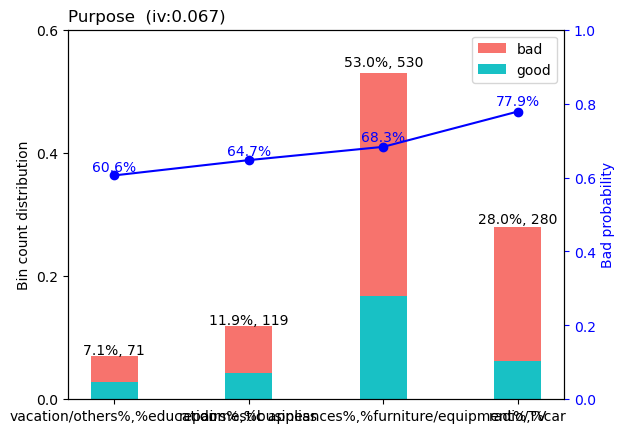

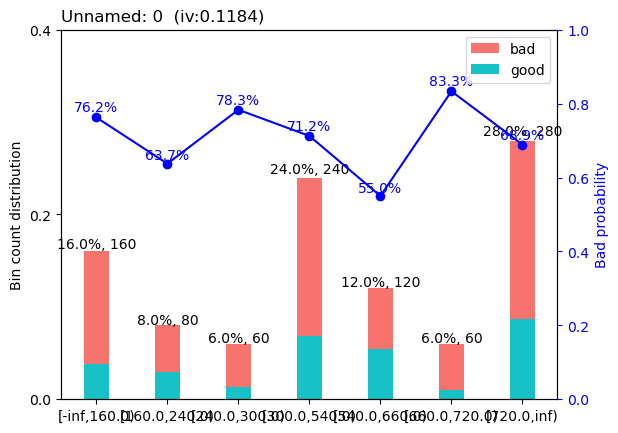

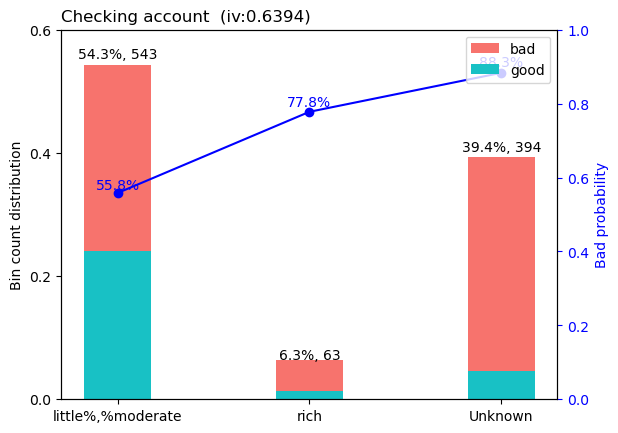

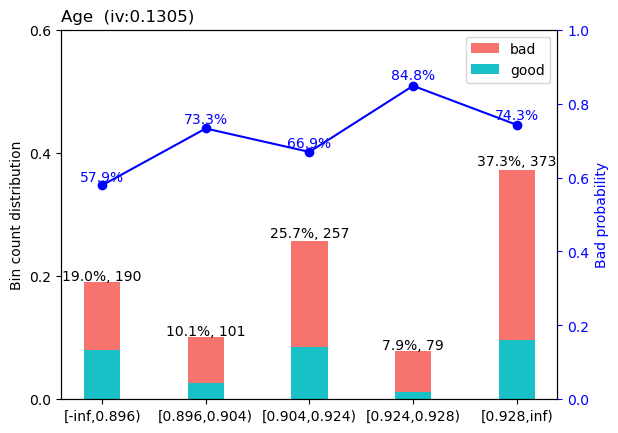

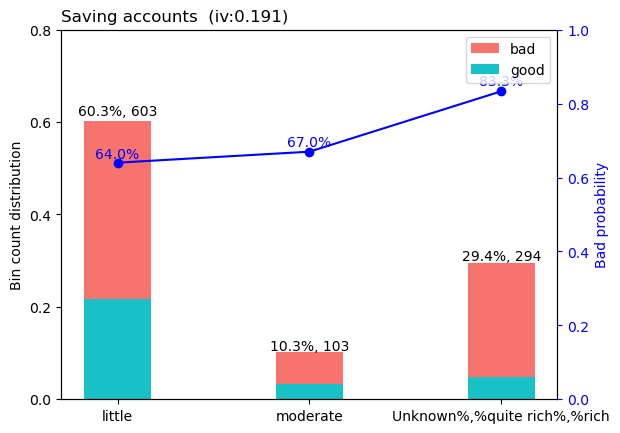

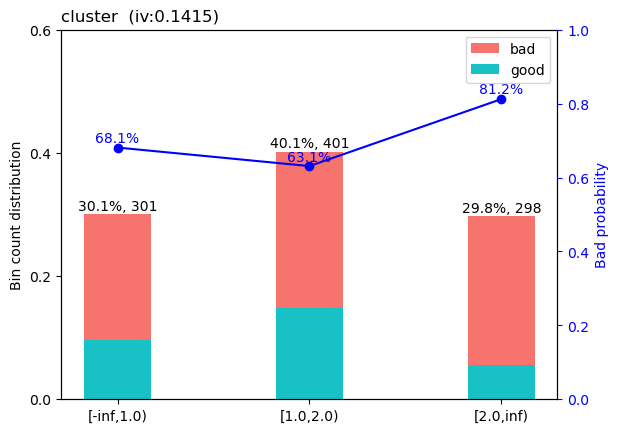

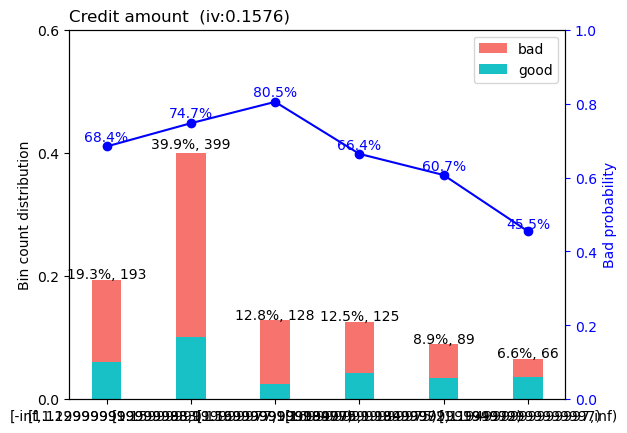

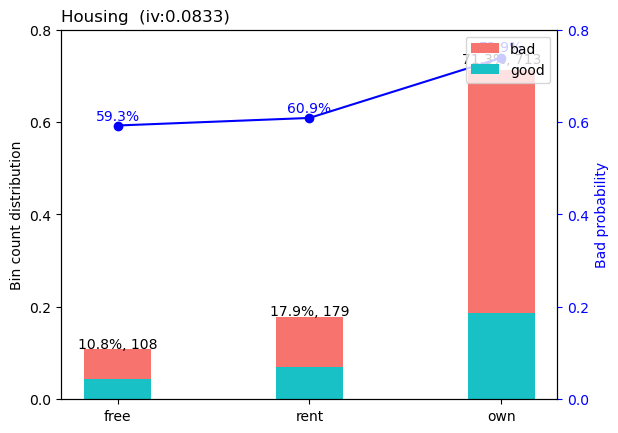

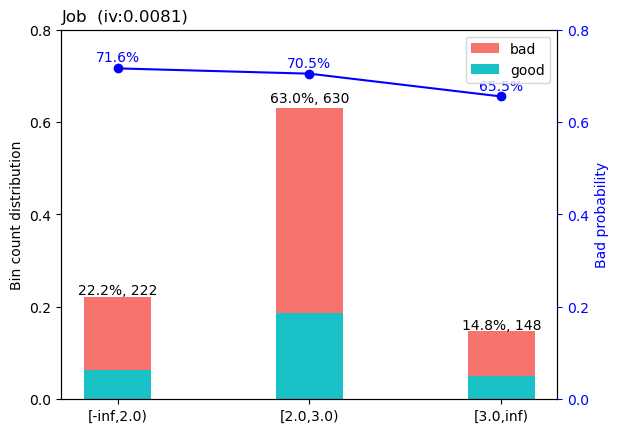

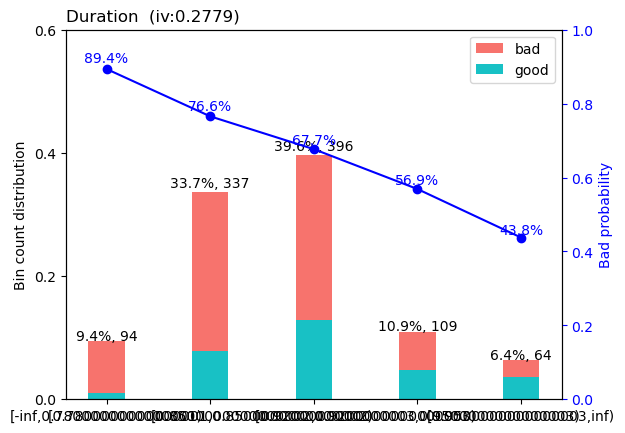

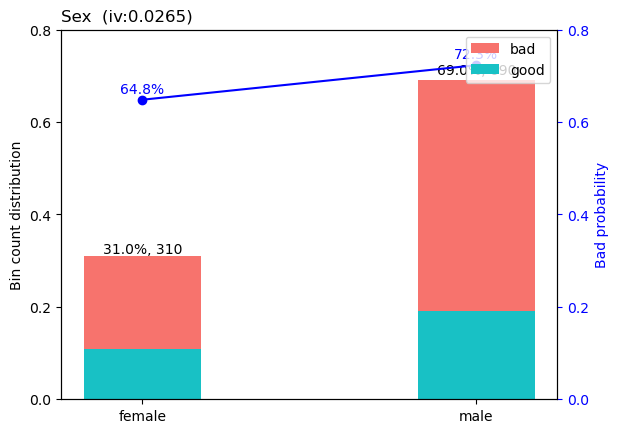

In [160]:
bins = sc.woebin(df, y = "Risk")
sc.woebin_plot(bins)


In [161]:
#convert dataset into woe values
df_woe = sc.woebin_ply(df, bins)
df_woe.head(10)

[INFO] converting into woe values ...


,Risk,Purpose_woe,Unnamed: 0_woe,Checking account_woe,Age_woe,Saving accounts_woe,cluster_woe,Credit amount_woe,Housing_woe,Job_woe,Duration_woe,Sex_woe
0,1,0.410063,0.319137,-0.614204,0.212371,0.762140,0.616288,-0.075370,0.194156,0.022780,1.280934,0.113035
1,0,0.410063,0.319137,-0.614204,-0.528844,-0.271358,-0.311121,-0.413662,0.194156,0.022780,-1.098612,-0.235341
2,1,-0.418302,0.319137,1.176263,0.212371,-0.271358,0.616288,0.234675,0.194156,0.078472,0.336214,0.113035
3,1,-0.079618,0.319137,-0.614204,0.212371,-0.271358,-0.311121,-0.413662,-0.472604,0.022780,-0.570311,0.113035
4,0,-0.079618,0.319137,-0.614204,0.212371,-0.271358,-0.311121,-0.166127,-0.472604,0.022780,-0.108341,0.113035
5,1,-0.418302,0.319137,1.176263,0.872488,0.762140,-0.311121,-1.029619,-0.472604,0.078472,-0.570311,0.113035
6,1,-0.079618,0.319137,1.176263,0.212371,0.762140,0.616288,0.568555,0.194156,0.022780,-0.108341,0.113035
7,1,-0.079618,0.319137,-0.614204,0.872488,-0.271358,-0.311121,-0.413662,-0.404445,-0.204413,-0.570311,0.113035
8,1,0.410063,0.319137,1.176263,0.212371,0.762140,0.616288,0.568555,0.194156,0.078472,0.336214,0.113035
9,0,-0.079618,0.319137,-0.614204,-0.142455,-0.271358,-0.311121,-0.166127,0.194156,-0.204413,-0.108341,0.113035


In [133]:
df_encoded

,Unnamed: 0,Age,Sex,Credit amount,Duration,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,0,67,1,1169,6,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,22,0,5951,48,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2,49,1,2096,12,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,3,45,1,7882,42,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
4,4,53,1,4870,24,0,0,1,0,1,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,0,1736,12,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
996,996,40,1,3857,30,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
997,997,38,1,804,12,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
998,998,23,1,1845,45,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0


In [162]:
df_woe = sc.woebin_ply(df, bins)
df_woe.head(10)

[INFO] converting into woe values ...


,Risk,Purpose_woe,Unnamed: 0_woe,Checking account_woe,Age_woe,Saving accounts_woe,cluster_woe,Credit amount_woe,Housing_woe,Job_woe,Duration_woe,Sex_woe
0,1,0.410063,0.319137,-0.614204,0.212371,0.762140,0.616288,-0.075370,0.194156,0.022780,1.280934,0.113035
1,0,0.410063,0.319137,-0.614204,-0.528844,-0.271358,-0.311121,-0.413662,0.194156,0.022780,-1.098612,-0.235341
2,1,-0.418302,0.319137,1.176263,0.212371,-0.271358,0.616288,0.234675,0.194156,0.078472,0.336214,0.113035
3,1,-0.079618,0.319137,-0.614204,0.212371,-0.271358,-0.311121,-0.413662,-0.472604,0.022780,-0.570311,0.113035
4,0,-0.079618,0.319137,-0.614204,0.212371,-0.271358,-0.311121,-0.166127,-0.472604,0.022780,-0.108341,0.113035
5,1,-0.418302,0.319137,1.176263,0.872488,0.762140,-0.311121,-1.029619,-0.472604,0.078472,-0.570311,0.113035
6,1,-0.079618,0.319137,1.176263,0.212371,0.762140,0.616288,0.568555,0.194156,0.022780,-0.108341,0.113035
7,1,-0.079618,0.319137,-0.614204,0.872488,-0.271358,-0.311121,-0.413662,-0.404445,-0.204413,-0.570311,0.113035
8,1,0.410063,0.319137,1.176263,0.212371,0.762140,0.616288,0.568555,0.194156,0.078472,0.336214,0.113035
9,0,-0.079618,0.319137,-0.614204,-0.142455,-0.271358,-0.311121,-0.166127,0.194156,-0.204413,-0.108341,0.113035


In [163]:
# split train-test data
X = df_encoded.drop(['Risk'], axis=1)
y = df_encoded['Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

print("X=",X_train.shape, X_test.shape)
print("y=",y_train.shape, y_test.shape)

X= (700, 29) (300, 29)
y= (700,) (300,)


In [164]:
X_train.head()

,Unnamed: 0,Age,Sex,Credit amount,Duration,Job_0,Job_1,Job_2,Job_3,Housing_free,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
328,328,0.914863,1,1.175990,0.927597,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
891,891,0.947405,1,1.144696,0.844907,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
255,255,0.902628,1,1.192019,0.967505,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
243,243,0.902628,0,1.127908,0.820286,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
492,492,0.902628,0,1.129621,0.732569,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [165]:
y_train

328    1
891    1
255    1
243    1
492    1
      ..
73     1
401    1
769    1
2      1
617    1
Name: Risk, Length: 700, dtype: int64

In [166]:
# WOE data
X_woe = df_woe.drop(['Risk'], axis=1)
y_woe = df_woe['Risk']

X_train_woe, X_test_woe, y_train_woe, y_test_woe = train_test_split(X_woe, y_woe, test_size=0.3, stratify=y_woe, random_state=42)

print("X=",X_train_woe.shape, X_test_woe.shape)
print("y=",y_train_woe.shape, y_test_woe.shape)

X= (700, 11) (300, 11)
y= (700,) (300,)


In [167]:
X_train_woe.head()

,Purpose_woe,Unnamed: 0_woe,Checking account_woe,Age_woe,Saving accounts_woe,cluster_woe,Credit amount_woe,Housing_woe,Job_woe,Duration_woe,Sex_woe
328,0.410063,0.060259,0.405465,-0.142455,-0.271358,-0.311121,-0.166127,0.194156,0.022780,-0.570311,0.113035
891,0.410063,-0.050516,1.176263,0.212371,-0.271358,0.616288,0.234675,0.194156,0.022780,0.336214,0.113035
255,0.410063,0.437900,-0.614204,0.160930,0.762140,-0.311121,-0.413662,0.194156,0.078472,-1.098612,0.113035
243,-0.241162,0.437900,1.176263,0.160930,-0.271358,-0.088636,-0.075370,0.194156,0.022780,0.336214,-0.235341
492,0.410063,0.060259,1.176263,0.160930,-0.139552,-0.088636,-0.075370,0.194156,0.022780,1.280934,-0.235341


In [168]:
y_woe

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 1000, dtype: int64

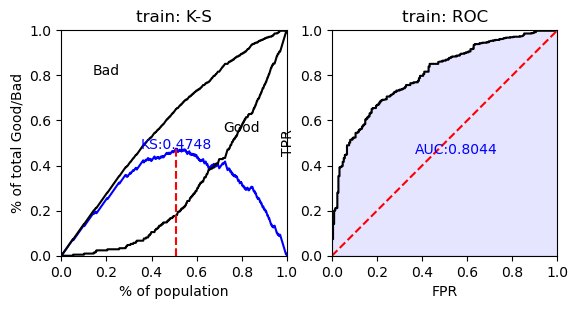

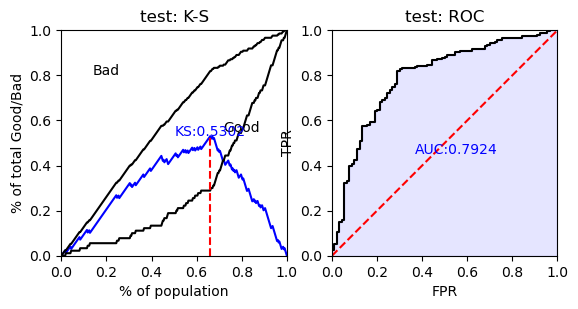

C:\Users\ADMIN\anaconda3\Lib\site-packages\scorecardpy\scorecard.py:353: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_score.loc[:,'score'] = card_basepoints + dat_score.sum(axis=1)


In [169]:
# logistic regression ------
lr = LogisticRegression(penalty='l1', C=0.9, solver='saga', n_jobs=-1)
lr.fit(X_train_woe, y_train_woe)
# lr.coef_
# lr.intercept_

# predicted proability
train_pred = lr.predict_proba(X_train_woe)[:,1]
test_pred = lr.predict_proba(X_test_woe)[:,1]

# performance ks & roc ------
train_perf = sc.perf_eva(y_train_woe, train_pred, title = "train")
test_perf = sc.perf_eva(y_test_woe, test_pred, title = "test")

# score ------
card = sc.scorecard(bins, lr, X_train_woe.columns)

# credit score
old_df = df.copy()
score = sc.scorecard_ply(old_df, card, only_total_score=False, print_step=0, replace_blank_na=True, var_kp = None)
#test_score = sc.scorecard_ply(test_woe, card, print_step=0)

In [170]:
score

,Purpose_points,Unnamed: 0_points,Checking account_points,Age_points,Saving accounts_points,cluster_points,Credit amount_points,Housing_points,Duration_points,Sex_points,score
0,-28.0,-22.0,36.0,-13.0,-45.0,21.0,4.0,-3.0,-88.0,-6.0,182.0
1,-28.0,-22.0,36.0,33.0,16.0,-10.0,24.0,-3.0,75.0,12.0,459.0
2,29.0,-22.0,-70.0,-13.0,16.0,21.0,-14.0,-3.0,-23.0,-6.0,241.0
3,6.0,-22.0,36.0,-13.0,16.0,-10.0,24.0,8.0,39.0,-6.0,404.0
4,6.0,-22.0,36.0,-13.0,16.0,-10.0,10.0,8.0,7.0,-6.0,358.0
...,...,...,...,...,...,...,...,...,...,...,...
995,6.0,4.0,-70.0,9.0,16.0,-3.0,-14.0,-3.0,-23.0,12.0,260.0
996,6.0,4.0,36.0,-13.0,16.0,-10.0,10.0,-3.0,7.0,-6.0,373.0
997,-28.0,4.0,-70.0,-13.0,16.0,21.0,4.0,-3.0,-23.0,-6.0,228.0
998,-28.0,4.0,36.0,33.0,16.0,-10.0,-14.0,8.0,39.0,-6.0,404.0


(array([ 16.,  53., 113., 146., 170., 179., 176.,  96.,  45.,   6.]),
 array([ 64. , 112.9, 161.8, 210.7, 259.6, 308.5, 357.4, 406.3, 455.2,
        504.1, 553. ]),
 <BarContainer object of 10 artists>)

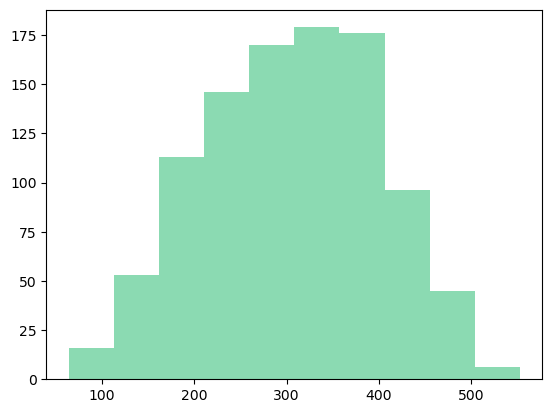

In [171]:
plt.hist(score["score"])

# 3. Another Models 

In [172]:
# evaluation function
def evaluation(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("="*50)
    
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Accuracy of TRAIN data:", 100*accuracy_score(y_train, y_train_pred))
    print("F1_Score of TRAIN data:", 100*f1_score(y_train, y_train_pred, average="macro"))
    print("="*50)
    
    print(confusion_matrix(y_test, y_test_pred))
    print(classification_report(y_test, y_test_pred))
    print("Accuracy of TEST data:", 100*accuracy_score(y_test, y_test_pred))
    print("F1_Score of TEST data:", 100*f1_score(y_test, y_test_pred, average="macro"))
    print("="*50)
    
    # calculate the RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print("RMSE: ", rmse)
    
    # calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_test_pred, average=None)
    print("ROC AUC score: ", roc_auc)
    

In [173]:
y_test

80     0
157    1
65     1
489    1
804    1
      ..
19     1
208    1
627    0
357    0
964    1
Name: Risk, Length: 300, dtype: int64

### Logistics Regression 

In [174]:
# initialize LogisticRegression and fit the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [179]:
# prediction
evaluation(logreg)

[[ 63 147]
 [ 54 436]]
              precision    recall  f1-score   support

           0       0.54      0.30      0.39       210
           1       0.75      0.89      0.81       490

    accuracy                           0.71       700
   macro avg       0.64      0.59      0.60       700
weighted avg       0.69      0.71      0.68       700

Accuracy of TRAIN data: 71.28571428571429
F1_Score of TRAIN data: 59.89979223133288
[[ 29  61]
 [ 19 191]]
              precision    recall  f1-score   support

           0       0.60      0.32      0.42        90
           1       0.76      0.91      0.83       210

    accuracy                           0.73       300
   macro avg       0.68      0.62      0.62       300
weighted avg       0.71      0.73      0.70       300

Accuracy of TEST data: 73.33333333333333
F1_Score of TEST data: 62.356484095614526
RMSE:  0.5163977794943222
ROC AUC score:  0.6158730158730159


### Decision Tree

In [180]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [181]:
evaluation(tree_model)

[[210   0]
 [  0 490]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       490

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[ 30  60]
 [ 52 158]]
              precision    recall  f1-score   support

           0       0.37      0.33      0.35        90
           1       0.72      0.75      0.74       210

    accuracy                           0.63       300
   macro avg       0.55      0.54      0.54       300
weighted avg       0.62      0.63      0.62       300

Accuracy of TEST data: 62.66666666666667
F1_Score of TEST data: 54.35774831558358
RMSE:  0.6110100926607787
ROC AUC score:  0.5428571428571429


### Random Forest 

In [184]:
regr_rfr = RandomForestClassifier(random_state=42, oob_score=True)
regr_rfr.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [185]:
evaluation(regr_rfr)

[[210   0]
 [  0 490]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       490

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[ 35  55]
 [ 27 183]]
              precision    recall  f1-score   support

           0       0.56      0.39      0.46        90
           1       0.77      0.87      0.82       210

    accuracy                           0.73       300
   macro avg       0.67      0.63      0.64       300
weighted avg       0.71      0.73      0.71       300

Accuracy of TEST data: 72.66666666666667
F1_Score of TEST data: 63.87453007518798
RMSE:  0.5228129047119374
ROC AUC score:  0.6301587301587301


### CatBoost

In [191]:
reg_catb = CatBoostClassifier(random_seed=42)
reg_catb.fit(X_train, y_train)


Learning rate set to 0.008847
0:	learn: 0.6900029	total: 127ms	remaining: 2m 7s
1:	learn: 0.6861055	total: 134ms	remaining: 1m 7s
2:	learn: 0.6830957	total: 140ms	remaining: 46.4s
3:	learn: 0.6797976	total: 144ms	remaining: 35.9s
4:	learn: 0.6761901	total: 150ms	remaining: 29.8s
5:	learn: 0.6728159	total: 155ms	remaining: 25.6s
6:	learn: 0.6700421	total: 158ms	remaining: 22.4s
7:	learn: 0.6674619	total: 162ms	remaining: 20.1s
8:	learn: 0.6641193	total: 167ms	remaining: 18.3s
9:	learn: 0.6612239	total: 172ms	remaining: 17s
10:	learn: 0.6581680	total: 178ms	remaining: 16s
11:	learn: 0.6556056	total: 182ms	remaining: 15s
12:	learn: 0.6523974	total: 187ms	remaining: 14.2s
13:	learn: 0.6501761	total: 192ms	remaining: 13.5s
14:	learn: 0.6476948	total: 198ms	remaining: 13s
15:	learn: 0.6449111	total: 203ms	remaining: 12.5s
16:	learn: 0.6422748	total: 208ms	remaining: 12s
17:	learn: 0.6397367	total: 214ms	remaining: 11.7s
18:	learn: 0.6376676	total: 220ms	remaining: 11.3s
19:	learn: 0.6362107	

In [192]:
evaluation(reg_catb)

[[175  35]
 [  4 486]]
              precision    recall  f1-score   support

           0       0.98      0.83      0.90       210
           1       0.93      0.99      0.96       490

    accuracy                           0.94       700
   macro avg       0.96      0.91      0.93       700
weighted avg       0.95      0.94      0.94       700

Accuracy of TRAIN data: 94.42857142857143
F1_Score of TRAIN data: 93.05836314677367
[[ 33  57]
 [ 17 193]]
              precision    recall  f1-score   support

           0       0.66      0.37      0.47        90
           1       0.77      0.92      0.84       210

    accuracy                           0.75       300
   macro avg       0.72      0.64      0.66       300
weighted avg       0.74      0.75      0.73       300

Accuracy of TEST data: 75.33333333333333
F1_Score of TEST data: 65.527950310559
RMSE:  0.496655480858378
ROC AUC score:  0.6428571428571428


### XGBoost

In [194]:
xgb_model = XGBClassifier(random_seed=42)
xgb_model.fit(X_train, y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:54:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "random_seed" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_seed=42, ...)

In [195]:
evaluation(xgb_model)

[[210   0]
 [  0 490]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00       490

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700

Accuracy of TRAIN data: 100.0
F1_Score of TRAIN data: 100.0
[[ 40  50]
 [ 25 185]]
              precision    recall  f1-score   support

           0       0.62      0.44      0.52        90
           1       0.79      0.88      0.83       210

    accuracy                           0.75       300
   macro avg       0.70      0.66      0.67       300
weighted avg       0.74      0.75      0.74       300

Accuracy of TEST data: 75.0
F1_Score of TEST data: 67.37948532076841
RMSE:  0.5
ROC AUC score:  0.6626984126984127


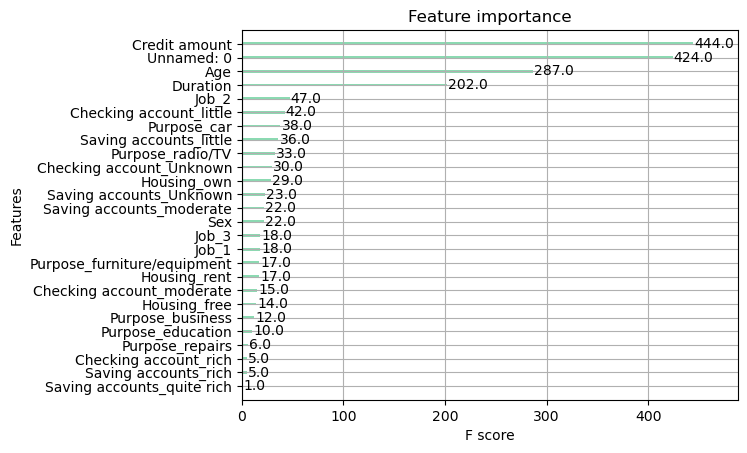

<Figure size 640x480 with 0 Axes>

In [197]:
plot_importance(xgb_model)
plt.show()
plt.savefig("Feature importance.png")

###  K-Nearest Neighbors (KNN)

k-NN was implemented with hyperparameter tuning for the k values.

In [ ]:
df_final = df_encoded_copy.copy()

In [125]:
X = df_final.drop(['Risk_good', 'Risk_bad'], axis=1)  # drop the target variable and the 'Risk_bad' column
y = df_final['Risk_good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


knn = KNeighborsClassifier()

parameters = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],  # Example values, you can choose others
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 is manhattan_distance and 2 is euclidean_distance
}

In [126]:
grid_search = GridSearchCV(estimator=knn, param_grid=parameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py

Best Hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}


C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [    nan 0.7125      nan 0.7125      nan 0.73125     nan 0.72375     nan
 0.7225      nan 0.71625     nan 0.7225      nan 0.7425      nan 0.73125
     nan 0.7325      nan 0.7325      nan 0.72875     nan 0.7375      nan
 0.725       nan 0.73625     nan 0.735       nan 0.7425      nan 0.74   ]
  warnings.warn(


In [127]:
best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       False       0.66      0.32      0.43        59
        True       0.77      0.93      0.84       141

    accuracy                           0.75       200
   macro avg       0.71      0.63      0.64       200
weighted avg       0.73      0.75      0.72       200

Accuracy Score: 0.75


#### Performance of Logistic Regression, the best model before Feature Engineering:

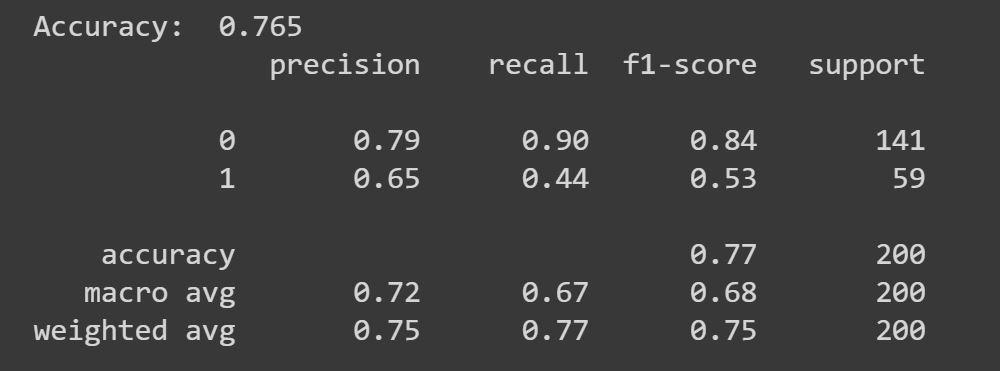

# Feature Engineering

#### After observing the Logistic Regression Model as the best model in terms of its performance by accuracy, precision, recall, and F1-score metrics, some feature engineering methods are performed to further improve the performance of the Logistic Regression Model.

First, a new column, credit_per_duration is created to further improve the results of the logistic regression model. 

In [211]:
df_final['credit_per_duration'] = df_excluded['Credit amount'] / df_excluded['Duration']

scaler = StandardScaler()

# Apply the scaler to the new column for consistency
df_final['credit_per_duration'] = scaler.fit_transform(df_final[['credit_per_duration']])

Then, the importance of each feature is calculated using correlation analysis.

In [55]:
correlation_matrix = df_final.corr()

# Calculate the correlation with the target variable
target_correlation = correlation_matrix['Risk_good'].abs().sort_values(ascending=False)

# Print the correlation values
print(target_correlation)

Risk_bad                       1.000000
Risk_good                      1.000000
Checking account_Unknown       0.322436
Checking account_little        0.258333
Duration                       0.215280
credit_per_duration            0.186487
Saving accounts_little         0.161007
Housing_own                    0.134589
Saving accounts_Unknown        0.129238
Checking account_moderate      0.119581
Credit amount                  0.109588
Purpose_radio/TV               0.106922
Age                            0.102463
Housing_rent                   0.092785
cluster                        0.087827
Saving accounts_rich           0.085749
Housing_free                   0.081556
Sex_male                       0.075493
Sex_female                     0.075493
Saving accounts_quite rich     0.070954
Purpose_education              0.049085
Checking account_rich          0.044009
Job_3                          0.040559
Purpose_business               0.036129
Purpose_vacation/others        0.028058


Three different models are trained and tested using the most important features, and then compared by their performance.

In [56]:
param_grid = [
    {'penalty': ['l1'], 'solver': ['liblinear', 'saga'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['l2'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga', 'liblinear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['elasticnet'], 'solver': ['saga'], 'l1_ratio': [0.5], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
    {'penalty': ['none'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}
]

# instantiate the logistic regression model
logreg = LogisticRegression()

# instantiate the grid search model
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, n_jobs=-1)

# fit the grid search to the data
grid_search.fit(X_train, y_train)

# print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [57]:
selected_columns = ['Risk_good', 'Risk_bad', 'Checking account_Unknown', 'Checking account_little', 'Duration']

# Create a new DataFrame with the selected columns
new_df = df_final[selected_columns].copy()
X = new_df.drop(['Risk_good', 'Risk_bad'], axis=1) # Drop both 'Risk' columns
y = new_df['Risk_good'] # Assuming 'Risk_good' is the target variable

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])

# fit the model with the training data
best_logreg.fit(X_train, y_train)

# make predictions on the test data
y_pred = best_logreg.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.765
              precision    recall  f1-score   support

       False       0.68      0.39      0.49        59
        True       0.78      0.92      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.66      0.67       200
weighted avg       0.75      0.77      0.74       200



In [58]:
selected_columns = ['Risk_good', 'Risk_bad', 'Checking account_Unknown', 'Checking account_little', 'credit_per_duration']

# Create a new DataFrame with the selected columns
new_df = df_final[selected_columns].copy()
X = new_df.drop(['Risk_good', 'Risk_bad'], axis=1) # Drop both 'Risk' columns
y = new_df['Risk_good'] # Assuming 'Risk_good' is the target variable

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])

# fit the model with the training data
best_logreg.fit(X_train, y_train)

# make predictions on the test data
y_pred = best_logreg.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.775
              precision    recall  f1-score   support

       False       0.73      0.37      0.49        59
        True       0.78      0.94      0.86       141

    accuracy                           0.78       200
   macro avg       0.76      0.66      0.67       200
weighted avg       0.77      0.78      0.75       200



In [59]:
selected_columns = ['Risk_good', 'Risk_bad', 'Checking account_Unknown', 'Checking account_little', 'credit_per_duration', 'Saving accounts_little']

# Create a new DataFrame with the selected columns
new_df = df_final[selected_columns].copy()
X = new_df.drop(['Risk_good', 'Risk_bad'], axis=1) # Drop both 'Risk' columns
y = new_df['Risk_good'] # Assuming 'Risk_good' is the target variable

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
best_logreg = LogisticRegression(C=grid_search.best_params_['C'], penalty=grid_search.best_params_['penalty'], solver=grid_search.best_params_['solver'])

# fit the model with the training data
best_logreg.fit(X_train, y_train)

# make predictions on the test data
y_pred = best_logreg.predict(X_test)

# evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.78
              precision    recall  f1-score   support

       False       0.70      0.44      0.54        59
        True       0.80      0.92      0.86       141

    accuracy                           0.78       200
   macro avg       0.75      0.68      0.70       200
weighted avg       0.77      0.78      0.76       200

